# Datenanalyse mit *Pandas* und *Matplotlib*

## Pandas
Pandas ist eine der am weiten verbreitesten Python-Biblitheken für Data Science. Pandas stellt 2 verschiedene Datentypen bereit:
* **Series**: entspricht einer Excel Spalte mit Index
<img src="series.png" alt="pands Series" width="100"/>
* **DataFrame**: 2D-Tabellenobjekt mit Spalten und Reihen (zusammengesetzt aus mehreren Series)
<img src="df.png" alt="pandas DataFrame" width="150"/>

Liegen Daten in dieser Form vor, können einfach Analysen, Datenmanipulation, Datenzusammenführung etc. damit durchgeführt werden.

Pandas liefert zudem eine `plot()` Funktion, die es ermöglicht die im DataFrame gehaltenen Daten direkt zu plotten. `plot()`  basiert auf der Python-Bibliothek *matplotlib*.

## Seaborn

Seaborn ist eine pythonbasierte Plotting-Bibliothek, die ebenfalls auf matplotlib basiert. Seaborn kann einfach mit pandas *DataFrame* Objekten umgehen.

## Jupyter notebook Grundlagen
* Anzeigen aller Shortcuts `Ctrl + Shift + P`
* Ausführen einer Zelle und Sprung zur nächsten Zelle `Shift + Enter`
* Auswahl der nächsten Zelle `Esc -> Down`, Auswahl der vorigen Zelle `Esc -> Up`
* Printing
  1. Nutzung der Python-`print()` Funktion
  2. Formatierte Ausgabe: Aufrufen einer Variablen in der letzten Zeile einer Zelle (ohne `print()`)

# Übungsaufgaben

## Dataset: Titanic

Verfügbar unter: https://www.kaggle.com/c/titanic/data. Arbeitsgrundlage für die Übungsaufgaben: **train.csv**.

### Erläuterung des Datensatzes
Der Datensatz enthält Passagierdaten des Kreuzfahrtschiffes Titanic, das am 15. April 1912 gesunken ist. Für jeden Passagier sind verschiedene Merkmale verfügbar:

| Merkmal | Erklärung|
| --------| ---------|
|survival | Hat der Passagier den Untergang überlebt? (0 = Nein, 1 = Ja) |
|pclass   | Ticket-/Passagierklasse (1= 1. Klasse, 2= 2. Klasse, 3 = 3. Klasse)|
|sex      | Geschlecht |
|age      | Alter in Jahren |
|sibsp    | Anzahl von Geschwistern/Ehepartnern  an Bord der Titanic |
|parch    | Anzahl von Eltern/Kindern an Bord der Titanic |
|ticket   | Ticket Nummer |
|fare     | Fahrpreis |
|cabin    | Kabinennummer |
|embarked | Einschiffungshafen (C = Cherbourg, Q = Queenstown, S = Southhampton)| 

In [2]:
# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# render plots in jupyter notebook
%matplotlib inline

## 2. CSV-Datei einlesen

Lade die Datei "titanic-train.csv" und weise sie der Veriablen `df` zu. Setze hierbei die *PassengerId* als DataFrame-Index.

**Tipp:** um zu kontrollieren, ob das Einlesen richtig funktioniert hat kannst du dir den Kopf des DataFrames anzeigen lassen.

In [4]:
df = pd.read_csv('titanic-train.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Infos anzeigen

Erste Analyse des `df` DataFrames. Lasse dir Folgendes ausgeben:

#### 1. die Dimensionen des DataFrames

In [3]:
df.shape

(891, 11)

#### 2. die ersten 8 Zeilen des DataFrames anzeigen

In [4]:
df.head(8)
# alternativ: df[:8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### 3. alle Spaltennamen des DataFrames ausgeben

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 4. eine statistische Zusammenfassung des DataFrames anzeigen

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Indexing & Sorting

#### 1. Selektiere die Spalten *Fare* und *Age* und gib den Head der Selektion aus

In [7]:
df[['Fare', 'Age']].head()

,Fare,Age
PassengerId,,
1,7.2500,22.0
2,71.2833,38.0
3,7.9250,26.0
4,53.1000,35.0
5,8.0500,35.0


#### 2. Selektiere die letzten 4 Reihen

In [8]:
df.iloc[-4:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### 3. Selektiere die Namen und Ticket Nummern für die Reihen 100-105

In [9]:
df.loc[100:105, ['Pclass', 'Ticket']]

,Pclass,Ticket
PassengerId,,
100,2,244367
101,3,349245
102,3,349215
103,1,35281
104,3,7540
105,3,3101276


#### 4. Selektiere die Reihen [10,20,30,40,50,60,70,80,90,100] und sortiere sie absteigend nach dem Alter

In [10]:
df.loc[[10,20,30,40,50,60,70,80,90,100]].sort_values(by=['Age'], ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S
80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


### 4.1 Bedingte Selektion

#### 1. Wie viele Passagiere reisen in Passagierklasse 1?

In [11]:
len(df[df['Pclass']==1].index)

216

#### 2. Welche Passagiere haben Geschwister (SibSp) und sind älter als 60 Jahre?

In [12]:
df[(df['SibSp']>0) & (df['Age']>60)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


## 5. Verschiedenes

#### 1. Lasse dir eine Auflistung der Anzahlen von eindeutigen Werten der Spalte *Embarked* ausgeben

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 2. Binary Encoding
1. Ersetze die String-Werte der Spalte 'Sex' durch Integer Werte (0 = female,1 =male).
2. Benenne die Spalte in `Male` um.

In [14]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df.rename(columns={'Sex': 'Male'}, inplace=True)

# Alternative 1:
# df['Male'] = df['Sex'].apply(lambda x: 0 if x == 'female' else 1)
# df.drop(['Sex'], axis=1, inplace=True)
# Alternative 2:
# df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# df.rename(columns={'Sex_male': 'Male'}, inplace=True)

## 6. Missing values

1. Enthält der DataFrame missing values?

In [15]:
df.isnull().any()

Survived    False
Pclass      False
Name        False
Male        False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

#### 2. Wie viele NaN Werte enthält der DataFrame in jeder einzelnen Spalte?

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Male          0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 3. Entferne die Spalte mit den meisten NaN Werten aus dem DataFrame

In [17]:
df.drop('Cabin', axis=1, inplace=True)

#### Entferne diejenigen Reihen, die NaN Werte in der Spalte *Embarked* enthalten

In [18]:
df.dropna(axis=0, subset=['Embarked'], inplace=True)

#### 5. Ersetze die NaN Werte der Spalte *Alter* mit dem durchschnittlichen Alter

In [19]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  

## Plots (Data Anlaysis)
### Seaborn

#### 1. Erstelle einen pairplot für die Spalten: [Pclass, Fare, Male, Parch, SibSp Age]

Fragestellungen:
* was stellt der Pairplot dar?
* Welche Zusammenhänge zwischen dem Überleben des Untergangs der Titanic und den einzelnen Features lassen sich ablesen?
* Welche Zusammenhänge zwischen den Features lassen sich ablesen?

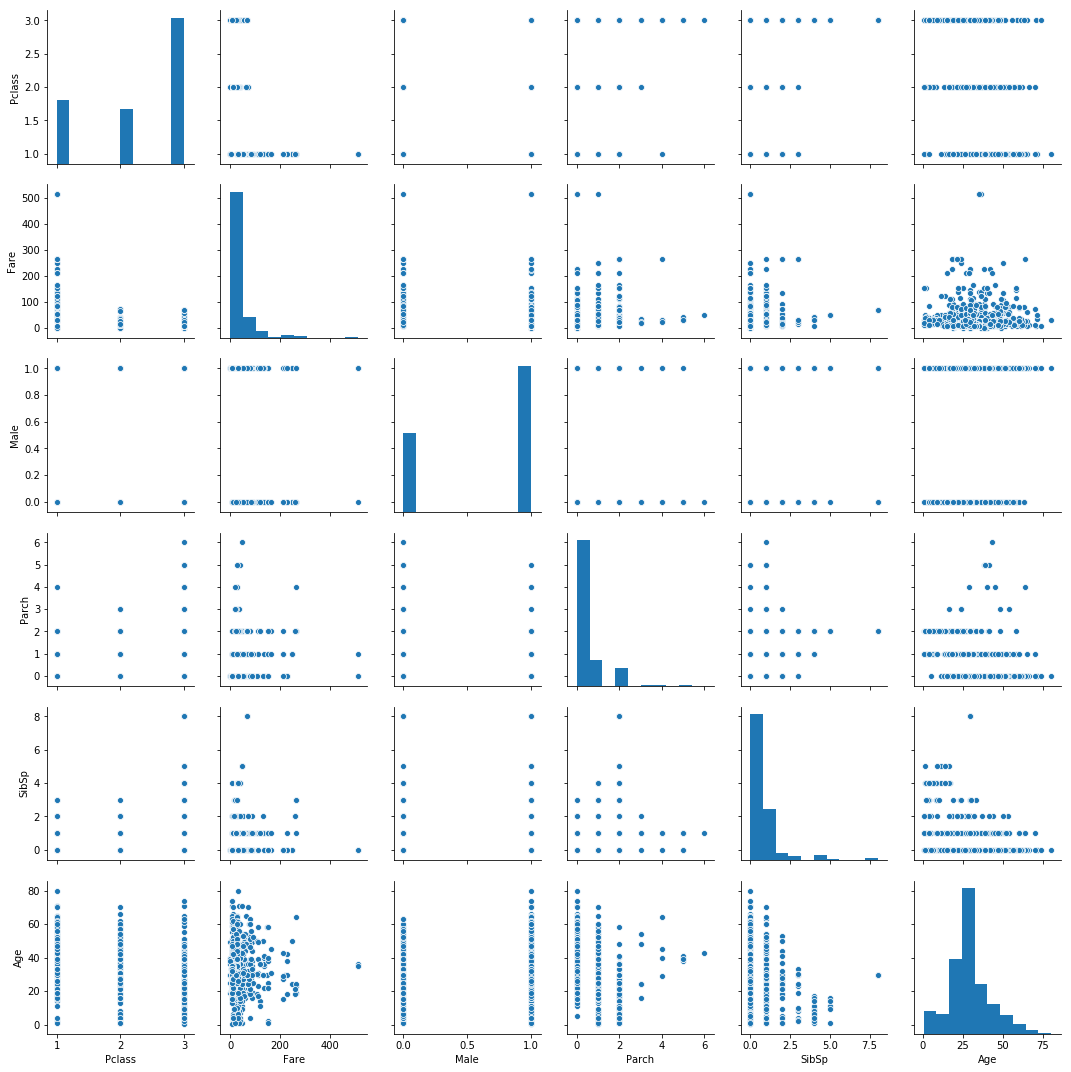

In [20]:
sns.pairplot(df, vars=['Pclass', 'Fare', 'Male', 'Parch', 'SibSp', 'Age'])

#### 2. Erstelle ein Säulendiagramm über die Klassenverteilung der Spalte Survived (Gegenüberstellung der Anzahl an Einträgen in den beiden Klassen)

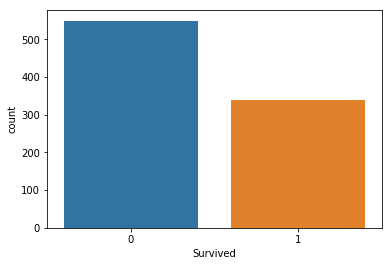

In [21]:
sns.countplot(x="Survived", data=df)

#### ZUSATZAUFGABE
#### 3. Erstelle einen Violinenplot mit folgenden Eigenschaften:
* X-Achse: "Pclass", Y-Achse: "Age", Farbtonvariable (engl. "hue"): "Survived", split=True

Was lässt sich daran ableiten?

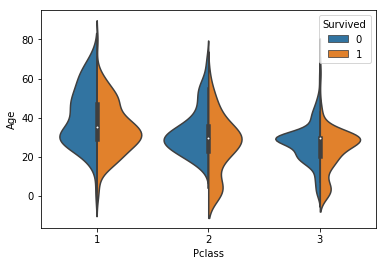

In [22]:
sns.violinplot(x="Pclass", y="Age", data=df, hue="Survived", split=True)

# Quiz

### 1. Wie hieß der jüngste Passagier der Titanic und wie alt war er?

In [23]:
df[df['Age'] == df['Age'].min()][['Name',  'Age']]

,Name,Age
PassengerId,,
804,"Thomas, Master. Assad Alexander",0.42


### 2. Unter welcher Passagierklasse und Ticketnummer ist Familie *Goodwin* gereist?

In [24]:
df[df['Name'].str.contains("Goodwin")][['Pclass', 'Ticket']]

,Pclass,Ticket
PassengerId,,
60,3,CA 2144
72,3,CA 2144
387,3,CA 2144
481,3,CA 2144
679,3,CA 2144
684,3,CA 2144


### 3. Überleben männlicher Passagiere:
#### Haben mehr männliche Passagiere der Passagierklasse 1 oder der Passagierklasse 3 den Untergang überlebt?

In [25]:
male_1_survived = len(df[(df['Pclass']== 1) & (df['Male']==1) & (df['Survived'] == 1)].index)
male_3_survived = len(df[(df['Pclass']== 3) & (df['Male']==1) & (df['Survived'] == 1)].index)
male_1_survived > male_3_survived

False

#### Plotte die Anzahl der männlichen Überlebenden für den Passagierklassen 1, 2 und 3.

Tipp: Nutze hierfür ein pandas Bar-Diagramm oder Seaborn Countplots

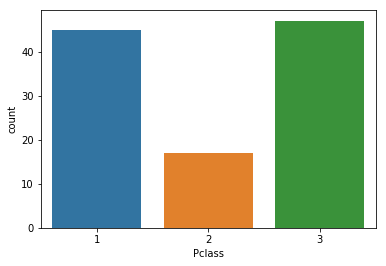

In [26]:
# df[(df['Male']==1) & (df['Survived'] == 1)]['Pclass'].value_counts().plot(kind='bar')
sns.countplot(x='Pclass', data=df[(df['Male']==1) & (df['Survived'] == 1)])  # ALTERNATIVE

### 4. Subplots
Erstelle einen Plot mit 2 Subplots (1 Reihe, 2 Spalten).

Die beiden Plots sollen die Anzahl der 
* a) Passagiere in den 3 Passagierklassen,
* b) der männlichen Passagiere,

getrennt nach Überleben/nicht-Überleben darstellen.

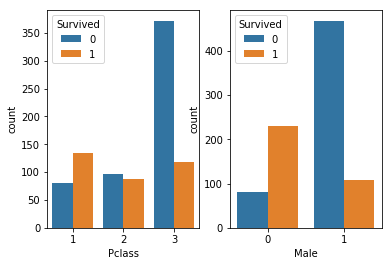

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(x="Pclass", data=df, hue="Survived", ax=ax1)
sns.countplot(x="Male", data=df, hue="Survived", ax=ax2)

# Principle Component Analysis

Entferne zunächst die Features `Name` und `Ticket` aus dem Dataframe. Das Feature `Embarked` enthält noch Strings, die für unsere weitere Analyse nicht verarbeiten können. Wende hier die One-Hot-Encoding Methode an. Tipp: Pandas besitzt dafür die `get_dummies()`-Methode.

In [28]:
df = df.drop(columns=["Name", "Ticket"])
df = pd.get_dummies(df, columns=["Embarked"])

Lass dir nun die Korrelationsmatrix des Datensatzes ausgeben und plotten. Welche Zusammenhänge sind erkennbar?

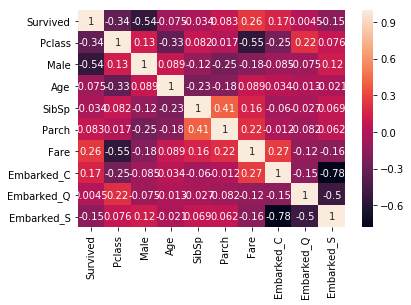

In [29]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

Wir wollen jetzt die PCA-Methode (Principal Component Analysis) verwenden, um die Dimension des Datensatzes zu reduzieren. In der nächsten Zelle werden daher die notwendigen Pakete importiert und das Dataframe vorverarbeitet. Führe die Zelle aus. Die Datenpunkte sind danach in der Variable `arr` gespeichert.

In [30]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

X = df.to_numpy()

arr = preprocessing.normalize(preprocessing.scale(X))

Initialisiere jetzt eine Instanz der `PCA`-Klasse mit **2** Komponenten und fitte diese mit ihrer eingebauten Methode auf den Datensatz. Transformiere den gleichen Datensatz danach. Überprüfe die Dimension des neuen Datensatzes mit `.shape`.

In [ ]:
pca = PCA(n_components=2)
pca.fit(arr)
trans = pca.transform(arr)
trans.shape
trans

Weise nun deinen transformierten Datensatz der Variable `data` zu und führe die Zelle aus. Was wird hier geplottet? Wieso sind die Ausprägungen der einzelnen Features in Clustern zu sehen?

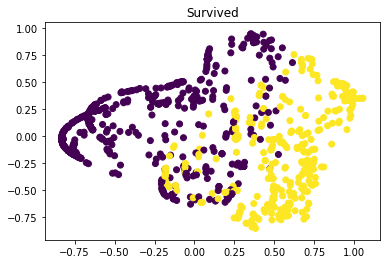

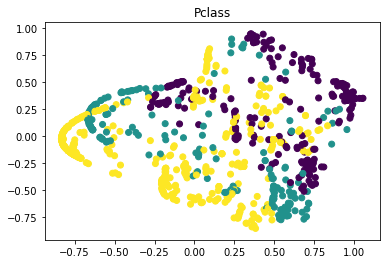

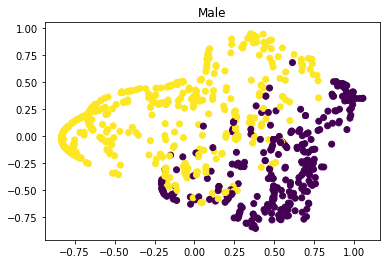

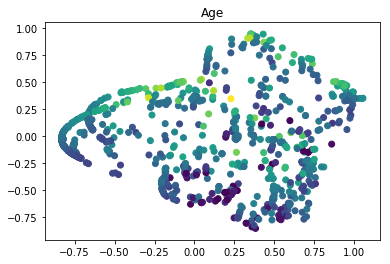

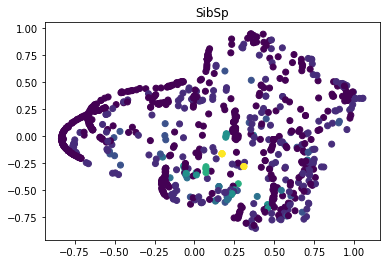

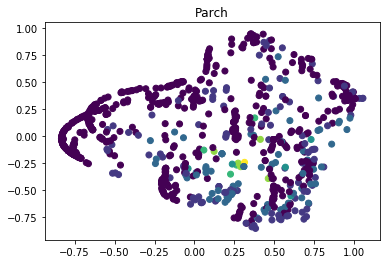

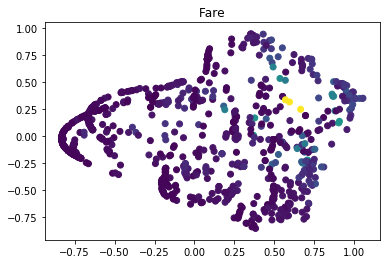

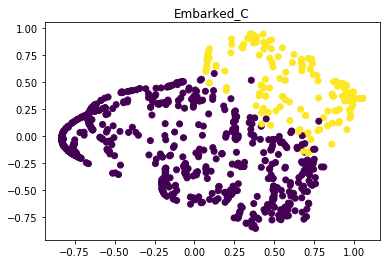

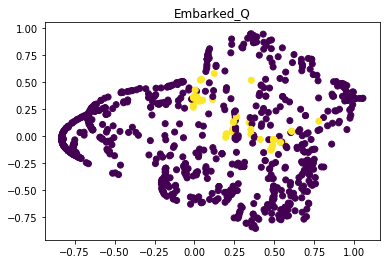

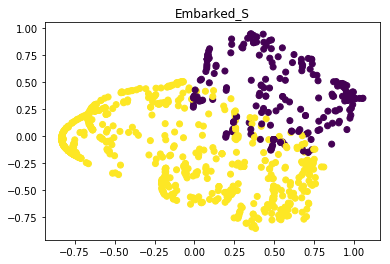

In [32]:
data = trans # füge hier deinen transformierten Datensatz ein

feat_list = list(df.columns)

for feat in feat_list:
    plt.title(feat)
    plt.scatter(data[:,0], data[:,1], edgecolors='face', c=df[feat].values)
    plt.show()